# Correlação: Armadura e vida.

**Sera abordado:**

*   Como foi realizado o teste para descobrir a redução correta.
*   Quando utilizar itens de vida ou de armadura.


O teste foi dividido em 3 categorias que estão devidamente separadas abaixo *(Tanques, lutadores e 'Fontes de dano')*

**Os resultados estarão simples de compreender, para ser inclusivos com os jogadores de mago.**








In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

reducao_de_dano = {
    0:0,
    10:9,
    20:17,
    30:23.5,
    40:29,
    50:33.5,
    60:38,
    70:41.5,
    80:44.5,
    90:47.5,
    100:50.5,
    110:53,
    120:55,
    130:57,
    140:58.5,
    150:60,
    160:62,
    170:63.5,
    180:65,
    190:66,
    200:67,
}


# Realização dos testes

* Foi utilizado um Aiden lv 3 com os seguintes itens:


1.   Arma: Arcane Edge
2.   Peito: *Nenhum*
3.   Cabeça: Welding Helmet
4. Braço: Minuteman Armband
5. Perna: Maverick Runner


* Aiden nessas devidas circunstancias causa exatos 200 de dano em seu **Q** na forma **corpo-a-corpo**
* Foi realizado o golpe, visto o dano no boneco alvo e logo após feito uma regra de 3 para descobrir a porcentagem que foi reduzida pela armadura.
* O Golpe foi realizado 21x, cada vez aumentando a armadura do boneco em 10, começando do 0 e indo até 200.

# Redução Geral de Armadura

<ipython-input-2-df730ebccace>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Quantidade de Armadura', y='Redução de dano em %', data=df, palette='viridis')


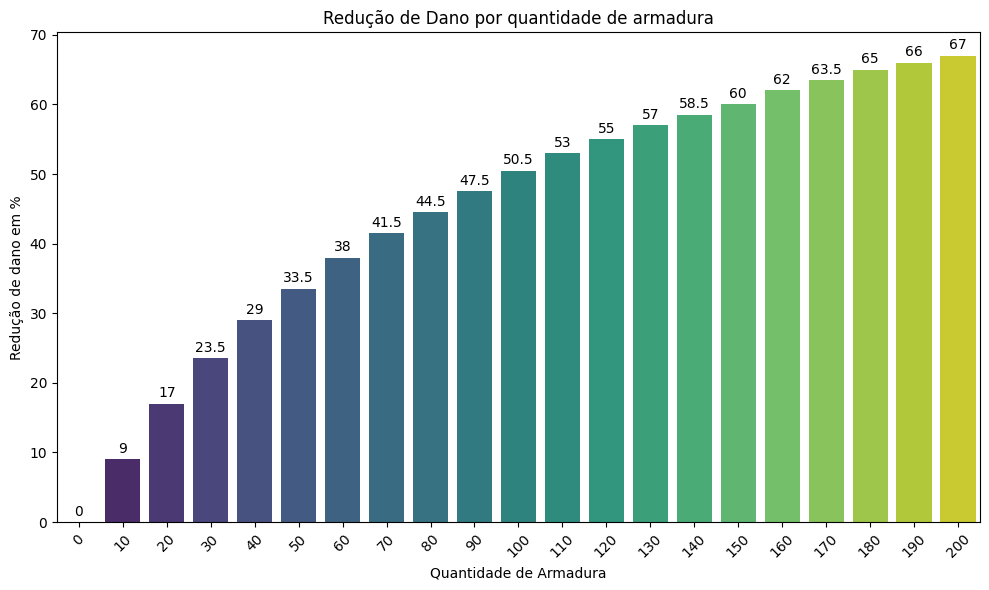

In [2]:
# Listas
armaduras = list(reducao_de_dano.keys())
reducoes = list(reducao_de_dano.values())

df = pd.DataFrame({'Quantidade de Armadura': armaduras, 'Redução de dano em %': reducoes})

# Opções Graficas

plt.figure(figsize=(10, 6))
sns.barplot(x='Quantidade de Armadura', y='Redução de dano em %', data=df, palette='viridis')

plt.title('Redução de Dano por quantidade de armadura')
plt.xlabel('Quantidade de Armadura')
plt.xticks(rotation=45)
plt.ylabel('Redução de dano em %')

for i, reducao in enumerate(reducoes):
    plt.text(i, reducao + 0.5, f'{reducao}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Conclusão**



*   Assim como em outros MOBAS, no Eternal Return existe o escalamento da armadura, assim, sendo diferente o aumento de 80 a 100 em comparação ao aumento de 180 a 200.
*   Contudo, no Eternal Return essa diferença não é muito grande *(em comparação a jogos como LOL)*, tornando mais útil o *stack* de armadura nesse jogo.
*  Possuir ao menos 1 item de armadura é importante contra assassinos, pois se o mesmo negar 30 ou mais de armadura corre o risco de você cair para **90** ou menos, diminuindo e **MUITO** a sua redução de dano.



In [3]:
# Função para obter redução de dano
def obter_reducao_de_dano(armadura):
    armadura = round(armadura)
    if armadura in reducao_de_dano:
        return reducao_de_dano[armadura] / 100
    else:
        # Se a armadura não estiver no dicionário, retorna a redução mínima
        return reducao_de_dano[max(reducao_de_dano.keys())] / 100

# Tanques (3000+ Vida)

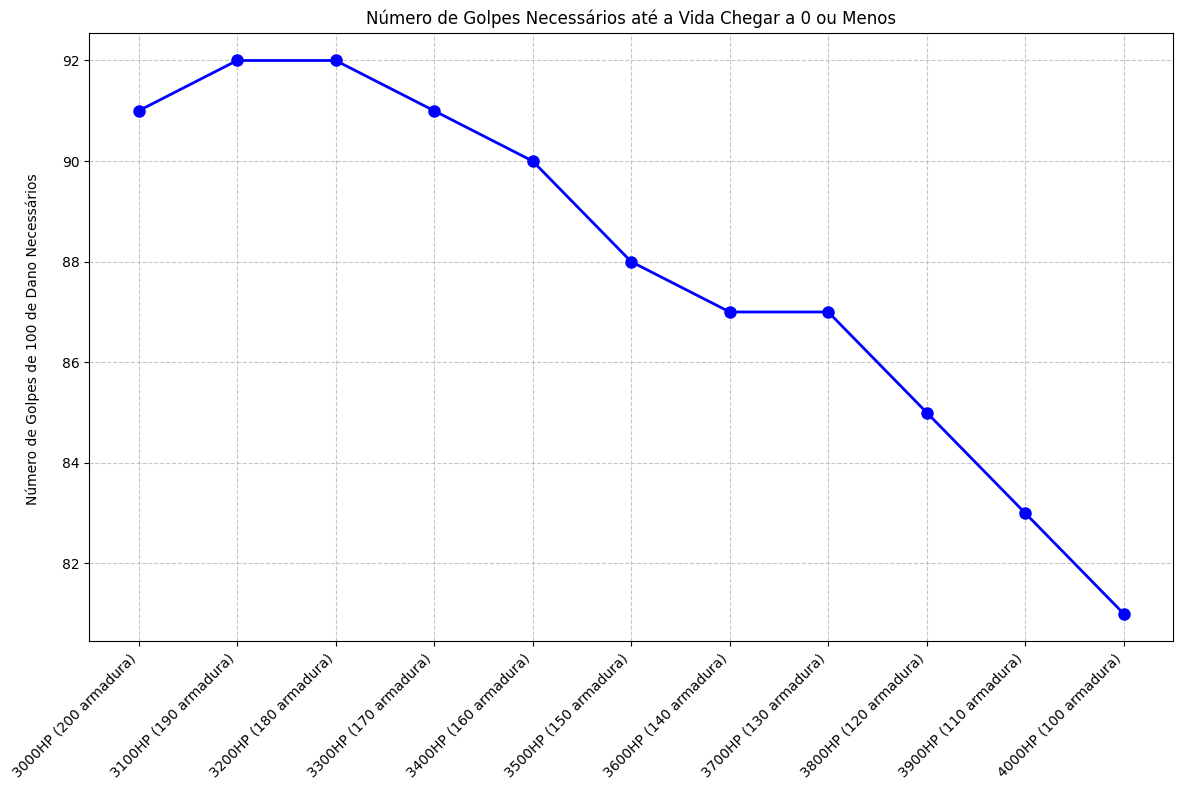

In [4]:
# Dados iniciais
num_pessoas = 11
vida_inicio = 4000
vida_fim = 3000
armadura_inicio = 100
armadura_fim = 200
dano_por_golpe = 100

# Gerar sequências de vida e armadura
vidas = np.arange(vida_inicio, vida_fim - 1, -100)
armaduras = np.linspace(armadura_inicio, armadura_fim, num_pessoas)

# Calcular o número de golpes necessários para cada combinação de vida e armadura
num_golpes = []
for vida, armadura in zip(vidas, armaduras):
    reducao = obter_reducao_de_dano(armadura)
    golpes_necessarios = np.ceil(vida / (dano_por_golpe * (1 - reducao)))
    num_golpes.append(golpes_necessarios)


# Plotar o gráfico de linhas
plt.figure(figsize=(12, 8))
plt.plot(vidas, num_golpes, marker='o', linestyle='-', color='blue', linewidth=2, markersize=8)

plt.ylabel('Número de Golpes de 100 de Dano Necessários \n')
plt.title('Número de Golpes Necessários até a Vida Chegar a 0 ou Menos')
plt.grid(True, linestyle='--', alpha=0.7)


# Configurar rótulos
rotulos_x = [f'{vida}HP ({int(armadura)} armadura)' for vida, armadura in zip(vidas, armaduras)]
plt.xticks(vidas, rotulos_x, rotation=45, ha='right')

plt.tight_layout()
plt.show()

**Conclusão**



*  Acima de 3000 de vida é mais interessante que você monte itens de **ARMADURA** no lugar de itens de **VIDA**.
*  É interessante utilizar itens com status diferentes como tenacidade *(RIP redução de dano em % nos itens)*.
*  Entre 190 a 180 de armadura mostra o melhor desempenho de armadura por vida.


# Lutadores (2000-3000 Vida)

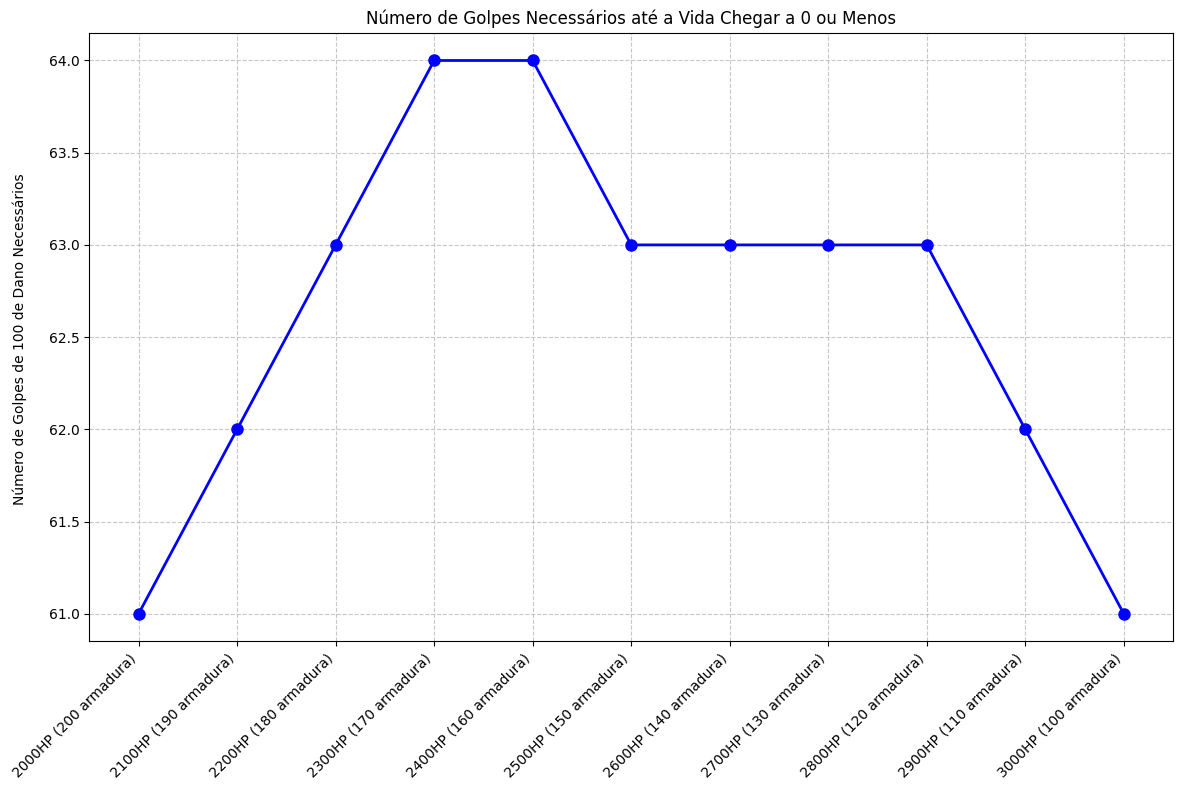

In [5]:
# Dados iniciais
num_pessoas = 11
vida_inicio = 3000
vida_fim = 2000
armadura_inicio = 100
armadura_fim = 200
dano_por_golpe = 100


# Gerar sequências de vida e armadura
vidas = np.arange(vida_inicio, vida_fim - 1, -100)
armaduras = np.linspace(armadura_inicio, armadura_fim, num_pessoas)

# Calcular o número de golpes necessários para cada combinação de vida e armadura
num_golpes = []
for vida, armadura in zip(vidas, armaduras):
    reducao = obter_reducao_de_dano(armadura)
    golpes_necessarios = np.ceil(vida / (dano_por_golpe * (1 - reducao)))
    num_golpes.append(golpes_necessarios)


# Plotar o gráfico de linhas
plt.figure(figsize=(12, 8))
plt.plot(vidas, num_golpes, marker='o', linestyle='-', color='blue', linewidth=2, markersize=8)

plt.ylabel('Número de Golpes de 100 de Dano Necessários \n')
plt.title('Número de Golpes Necessários até a Vida Chegar a 0 ou Menos')
plt.grid(True, linestyle='--', alpha=0.7)


# Configurar rótulos
rotulos_x = [f'{vida}HP ({int(armadura)} armadura)' for vida, armadura in zip(vidas, armaduras)]
plt.xticks(vidas, rotulos_x, rotation=45, ha='right')

plt.tight_layout()
plt.show()

**Conclusão**

Lutadores são um caso a parte, então vamos dividir em 2 categorias.

1.   Lutadores Ofensivos
2.   Lutadores Defensivos


**Lutadores Ofensivos:**

* Como lutador ofensivo, você ter ao menos 1 item defensivo, imagino que apenas 1 nesse caso priorizar vida trará um beneficio maior, pois você não vai conseguir chegar a um nível de armadura em que seja mais útil armadura á vida

**Lutadores Defensivos:**

* Como lutador defensivo, você deve ter ao menos 2 itens defensivos, nesse caso priorizar a armadura é mais interessante que priorizar a vida.
* Acima de 150 de armadura demonstra uma utilidade maior á itens de vida.




# Atiradores, magos e assassinos (1000-2000 Vida)

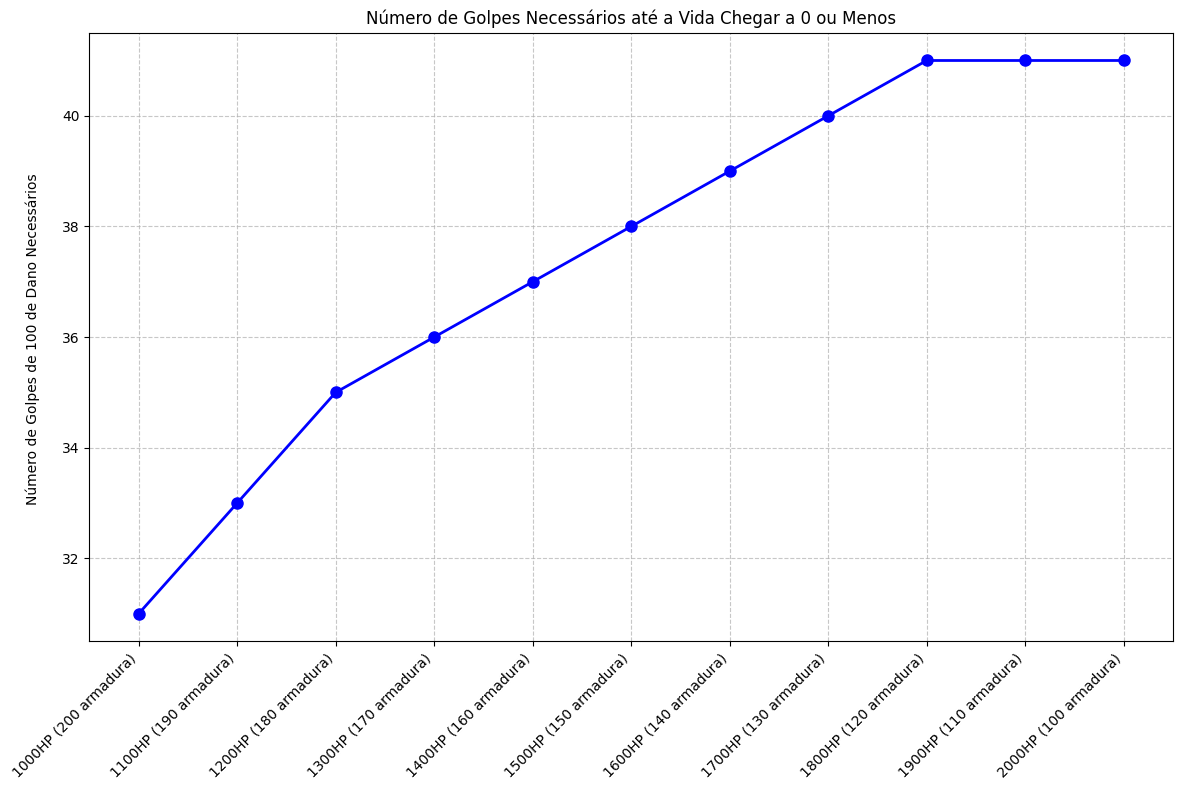

In [6]:
# Dados iniciais
num_pessoas = 11
vida_inicio = 2000
vida_fim = 1000
armadura_inicio = 100
armadura_fim = 200
dano_por_golpe = 100

# Gerar sequências de vida e armadura
vidas = np.arange(vida_inicio, vida_fim - 1, -100)
armaduras = np.linspace(armadura_inicio, armadura_fim, num_pessoas)

# Calcular o número de golpes necessários para cada combinação de vida e armadura
num_golpes = []
for vida, armadura in zip(vidas, armaduras):
    reducao = obter_reducao_de_dano(armadura)
    golpes_necessarios = np.ceil(vida / (dano_por_golpe * (1 - reducao)))
    num_golpes.append(golpes_necessarios)


# Plotar o gráfico de linhas
plt.figure(figsize=(12, 8))
plt.plot(vidas, num_golpes, marker='o', linestyle='-', color='blue', linewidth=2, markersize=8)

plt.ylabel('Número de Golpes de 100 de Dano Necessários \n')
plt.title('Número de Golpes Necessários até a Vida Chegar a 0 ou Menos')
plt.grid(True, linestyle='--', alpha=0.7)


# Configurar rótulos
rotulos_x = [f'{vida}HP ({int(armadura)} armadura)' for vida, armadura in zip(vidas, armaduras)]
plt.xticks(vidas, rotulos_x, rotation=45, ha='right')

plt.tight_layout()
plt.show()

**Conclusão**

* Para personagens que por sua natureza possuem pouca vida, fazer itens que possuem vida vai aumentar muito mais a sua sobrevivência do que comprar itens que aumentem a sua armadura
* Lembrando que, itens de armadura farão com que sua armadura não seja quase que ignorada por assassinos.

# FAQ

**Perguntas**

1. Quem sou eu?
* Prazer, meu nome é Pedro porém sou mais conhecido como *Adevo* no meio do Eternal Return

2.   Tempo de jogo?
* Não costumo jogar tanto, raramente passo de 200 partidas ranqueadas mas jogo desde a terceira temporada da Solo.

3.   Personagem favorito?
* Yuki.
4.   Servidor?
* South America.
5. Data realizada o teste?
* 18/07/2024 - (DD/MM/YYYY)